In [721]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import plotly as py
from chart_studio import plotly
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import math
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")



In [722]:
filepath = "C:\\Users\\Checkout\\Documents\\SJSU Spring 2022\\CMPE 255\\Project\\team1-movie-recommendation-system\\code\\data\\Movies.csv"
movies = pd.read_csv(filepath,parse_dates=['release_date'])
movies.describe()


,revenue,vote_average,vote_count,runtimes
count,1.000000e+04,10000.00000,10000.000000,9880.000000
mean,3.011465e+07,5.62239,306.007400,100.250304
std,1.007216e+08,1.73693,899.275606,21.059847
min,0.000000e+00,0.00000,0.000000,5.000000
25%,0.000000e+00,5.10000,9.000000,89.000000
50%,0.000000e+00,6.00000,40.000000,97.000000
75%,1.326253e+07,6.70000,189.000000,109.000000
max,3.000000e+09,10.00000,16852.000000,480.000000


In [723]:
display(movies.sample(10))

,revenue,vote_average,vote_count,title,original_language,release_date,production_companies,production_countries,genres,director,producer,cast,runtimes,writer
3174,37962774.0,5.1,290,Howard the Duck,en,1986-08-01,"Lucasfilm,Universal Pictures",United States of America,"Comedy,Fantasy,Science Fiction",Willard Huyck,"Robert Latham Brown,Ian Bryce,Gloria Katz,","Lea Thompson,Jeffrey Jones,Tim Robbins,",110.0,"Steve Gerber,Willard Huyck,Gloria Katz,"
5988,0.0,6.2,35,Caveman,en,1981-04-17,Turman-Foster Company,United States of America,"Comedy,Adventure",Carl Gottlieb,"David Foster,Lawrence Turman","Ringo Starr,Dennis Quaid,Shelley Long,",91.0,"Rudy De Luca,Carl Gottlieb"
790,959000.0,7.3,144,The Long Goodbye,en,1973-03-07,"Lions Gate Films,E-K-Corporation,United Artists",United States of America,"Thriller,Crime,Drama,Mystery",Robert Altman,"Jerry Bick,Robert Eggenweiler,Elliott Kastner","Elliott Gould,Nina van Pallandt,Sterling Hayden,",112.0,"Leigh Brackett,Raymond Chandler"
7399,0.0,5.9,50,Clownhouse,fr,1989-01-15,Commercial Pictures,United States of America,Horror,Victor Salva,"Roman Coppola,Michael Danty,Robin Mortarotti,","Nathan Forrest Winters,Brian McHugh,Sam Rockwell,",81.0,Victor Salva
3801,0.0,6.8,212,Young Sherlock Holmes,en,1985-12-04,"Amblin Entertainment,Paramount",United States of America,"Action,Adventure,Family",Barry Levinson,"Harry Benn,Mark Johnson,Kathleen Kennedy,","Nicholas Rowe,Alan Cox,Sophie Ward,",109.0,"Arthur Conan Doyle,Chris Columbus"
9349,0.0,5.7,12,Paris Blues,en,1961-09-27,"Monmouth,Pennebaker Productions,Diane Producti...",United States of America,"Romance,Drama,Music",Martin Ritt,"Georges Glass,Walter Seltzer,Sam Shaw,","Paul Newman,Joanne Woodward,Sidney Poitier,",98.0,"Jack Sher,Irene Kamp,Walter Bernstein,"
258,363889678.0,7.0,1798,Notting Hill,en,1999-05-13,"Notting Hill Pictures,Polygram Filmed Entertai...","United Kingdom,United States of America","Romance,Comedy,Drama",Roger Michell,"Tim Bevan,Richard Curtis,Eric Fellner,","Julia Roberts,Hugh Grant,Richard McCabe,",124.0,Richard Curtis
2360,98376292.0,5.7,842,Evolution,en,2001-06-08,"Montecito Picture Company, The,Columbia Pictur...",United States of America,"Action,Comedy,Science Fiction",J.T.S. Moore,J.T.S. Moore,"Linus Torvalds,Richard M. Stallman,Eric Raymond,",85.0,J.T.S. Moore
6620,0.0,4.0,12,The Crypt,en,2009-01-01,NaN,United States of America,Horror,Craig McMahon,"Cecil Chambers,Nathan Hill,Craig McMahon","Sarah Oh,Mike Ranallo,Abra May,",84.0,Craig McMahon
3962,24444121.0,7.4,295,Sling Blade,en,1996-08-30,Miramax Films,United States of America,Drama,Billy Bob Thornton,"David L. Bushell,Larry Meistrich,Brandon Rosser","Billy Bob Thornton,Dwight Yoakam,J.T. Walsh,",135.0,"Billy Bob Thornton,Billy Bob Thornton"


In [724]:
movies.isnull().sum().sort_values(ascending=False)

production_companies    1485
writer                   290
genres                   243
runtimes                 120
producer                 115
director                  69
cast                      32
release_date               8
revenue                    0
vote_average               0
vote_count                 0
title                      0
original_language          0
production_countries       0
dtype: int64

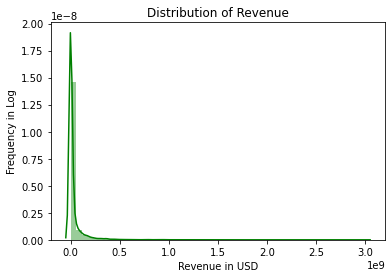

In [725]:
sns.distplot(movies['revenue'],color='g')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue in USD')
plt.ylabel('Frequency in Log')
plt.show()

In [726]:
movies['revenue'].replace(0,np.nan,inplace=True)
movies['revenue'].isnull().sum()

6337

In [727]:
movies.loc[movies.revenue.isnull(), 'revenue'] = movies.groupby(pd.Grouper(key='release_date', axis=0, freq='1Y'))['revenue'].transform('median')
movies['revenue'].isnull().sum()

138

In [728]:
movies.drop(movies.index[movies.revenue.isna() == True],inplace=True)
display(movies.shape)
display(movies['revenue'].isnull().sum())

(9862, 14)

0

In [729]:
movies.isnull().sum().sort_values(ascending=False)

production_companies    1463
writer                   288
genres                   237
runtimes                 118
producer                 108
director                  67
cast                      31
revenue                    0
vote_average               0
vote_count                 0
title                      0
original_language          0
release_date               0
production_countries       0
dtype: int64

In [730]:
#drop movies with null values i genres
movies.dropna(subset=['genres'],inplace=True)
movies.isnull().sum().sort_values(ascending=False)



production_companies    1271
writer                   234
producer                  87
runtimes                  82
director                  33
cast                      30
revenue                    0
vote_average               0
vote_count                 0
title                      0
original_language          0
release_date               0
production_countries       0
genres                     0
dtype: int64

In [731]:
#drop those rows with vote_count < 10 i.e. atleast 10 user should have voted for the movie
movies= movies[movies['vote_count'] > 10]
movies.isnull().sum().sort_values(ascending=False)
#replace null in cast,director,producer,production_companies,writercolumn with "Unknown"
movies['cast'].replace(np.nan,"Unknown",inplace=True)
movies['director'].replace(np.nan,"Unknown",inplace=True)
movies['producer'].replace(np.nan,"Unknown",inplace=True)
movies['production_companies'].replace(np.nan,"Unknown",inplace=True)
movies['writer'].replace(np.nan,"Unknown",inplace=True)
movies.isnull().sum().sort_values(ascending=False)


runtimes                38
revenue                  0
vote_average             0
vote_count               0
title                    0
original_language        0
release_date             0
production_companies     0
production_countries     0
genres                   0
director                 0
producer                 0
cast                     0
writer                   0
dtype: int64

In [732]:
movies.runtimes.fillna(movies.runtimes.mean(), inplace=True)
movies.isnull().sum().sort_values(ascending=False)

revenue                 0
vote_average            0
vote_count              0
title                   0
original_language       0
release_date            0
production_companies    0
production_countries    0
genres                  0
director                0
producer                0
cast                    0
runtimes                0
writer                  0
dtype: int64

In [733]:
def str_to_list(x):
    return list(x.split(","))

In [734]:
#convert genres seperated by string to list 
movies['genres'] = movies['genres'].apply(str_to_list)
print(movies['genres'][0])


['Crime', 'Comedy']


In [735]:
#find the frequency of each genre
genre_frequency = {}
unique_genre_set = set()

for row in movies['genres']:
    for genre in row:
        unique_genre_set.add(genre)
        if genre in genre_frequency:
            genre_frequency[genre]+=1
        else:
            genre_frequency[genre]=1
unique_genre_list = list(unique_genre_set)
display(genre_frequency)

{'Crime': 1119,
 'Comedy': 2733,
 'Action': 1653,
 'Thriller': 1889,
 'Adventure': 1073,
 'Science Fiction': 834,
 'Animation': 397,
 'Family': 817,
 'Drama': 3118,
 'Romance': 1299,
 'Mystery': 592,
 'Music': 315,
 'Documentary': 214,
 'Fantasy': 629,
 'War': 210,
 'Western': 202,
 'History': 225,
 'Horror': 1065,
 'TV Movie': 109}

<AxesSubplot:>

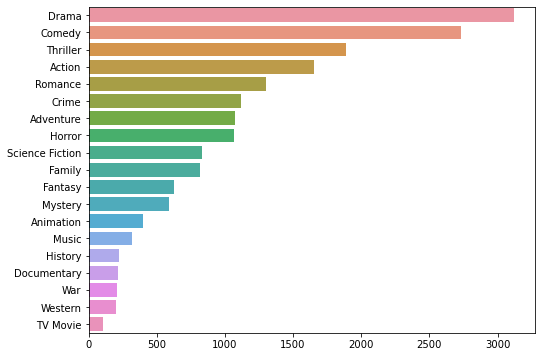

In [736]:
#find the most prevalent genres
sorted_values = sorted(genre_frequency.values(),reverse=True) 
sorted_genre = {}

for i in sorted_values:
    for k in genre_frequency.keys():
        if genre_frequency[k] == i:
            sorted_genre[k] = genre_frequency[k]
            
plt.figure(figsize = (8,6))
sns.barplot(y=list(sorted_genre.keys()),x = list(sorted_genre.values()))

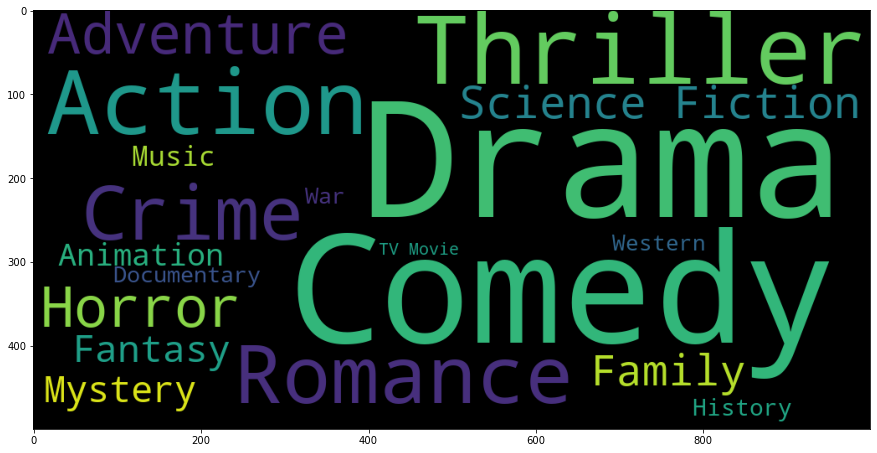

In [737]:
#wordcloud for genres
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(genre_frequency)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [738]:
#one hot encoding for genre, director and cast columns
def binary(genre_list):
    binaryList = []
    
    for genre in unique_genre_list:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [739]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()
movies.isnull().sum()
display(movies)

,revenue,vote_average,vote_count,title,original_language,release_date,production_companies,production_countries,genres,director,producer,cast,runtimes,writer,genres_bin
0,4300000.0,6.6,714,Four Rooms,en,1995-12-09,"Miramax Films,A Band Apart",United States of America,"[Crime, Comedy]","Allison Anders,Alexandre Rockwell,Robert Rodri...","Lawrence Bender,Paul Hellerman,Scott Lambert,","Sammi Davis,Amanda De Cadenet,Valeria Golino,",98.0,"Allison Anders,Alexandre Rockwell,Robert Rodri...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,12.0,6.4,96,Judgment Night,en,1993-10-15,"Universal Pictures,Largo Entertainment,JVC Ent...","Japan,United States of America","[Action, Thriller, Crime]",Stephen Hopkins,"Gene Levy,Christopher Mollo,Lloyd Segan,","Emilio Estevez,Cuba Gooding Jr.,Denis Leary,",110.0,"Lewis Colick,Jere Cunningham,Lewis Colick","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."
2,775398007.0,8.1,8550,Star Wars,en,1977-05-25,"Lucasfilm,20th Century Fox",United States of America,"[Adventure, Action, Science Fiction]",George Lucas,"Gary Kurtz,George Lucas,Rick McCallum","Mark Hamill,Harrison Ford,Carrie Fisher,",121.0,George Lucas,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,940335536.0,7.7,8085,Finding Nemo,en,2003-05-30,Pixar,United States of America,"[Animation, Family]","Andrew Stanton,Lee Unkrich","Jinko Gotoh,John Lasseter,Graham Walters","Albert Brooks,Ellen DeGeneres,Alexander Gould,",100.0,"Andrew Stanton,Andrew Stanton,Bob Peterson,","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,677945399.0,8.3,10346,Forrest Gump,en,1994-07-06,Paramount,United States of America,"[Comedy, Drama, Romance]",Robert Zemeckis,"Wendy Finerman,Charles Newirth,Steve Starkey,","Tom Hanks,Rebecca Williams,Sally Field,",142.0,"Winston Groom,Eric Roth","[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,14008145.0,6.8,11,The New Centurions,en,1972-08-03,"Columbia Pictures,Chartoff-Winkler Productions",United States of America,"[Crime, Drama, Action]",Richard Fleischer,"Robert Chartoff,Henry Gellis,Irwin Winkler","George C. Scott,Stacy Keach,Jane Alexander,",103.0,"Stirling Silliphant,Joseph Wambaugh,Robert Towne","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."
9992,11450000.0,7.2,16,There's Always Tomorrow,en,1956-02-01,Universal International Pictures,United States of America,"[Comedy, Drama]",Richard Fleischer,"Robert Chartoff,Henry Gellis,Irwin Winkler","George C. Scott,Stacy Keach,Jane Alexander,",103.0,"Stirling Silliphant,Joseph Wambaugh,Robert Towne","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9993,15692207.5,7.5,12,Let's Get Lost,en,1988-09-15,Unknown,United States of America,"[Music, Documentary]",Bruce Weber,"Emie Amemiya,Nan Bush,Stephen Cohen,","Chet Baker,Carol Baker,Vera Baker,",120.0,Unknown,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
9994,49718611.0,5.6,14,Elvis Has Left the Building,en,2004-08-27,"Equity Pictures Medienfonds GmbH & Co. KG,Capi...",United States of America,[Comedy],Joel Zwick,"Jane Barclay,Sharon Harel,Manfred D. Heid,","Kim Basinger,John Corbett,Annie Potts,",90.0,"Mitchell Ganem,Adam-Michael Garber","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [740]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

In [741]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'cast'] = str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [742]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [743]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [744]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, ...
2    [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
3    [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...
4    [1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, ...
Name: cast_bin, dtype: object

In [745]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

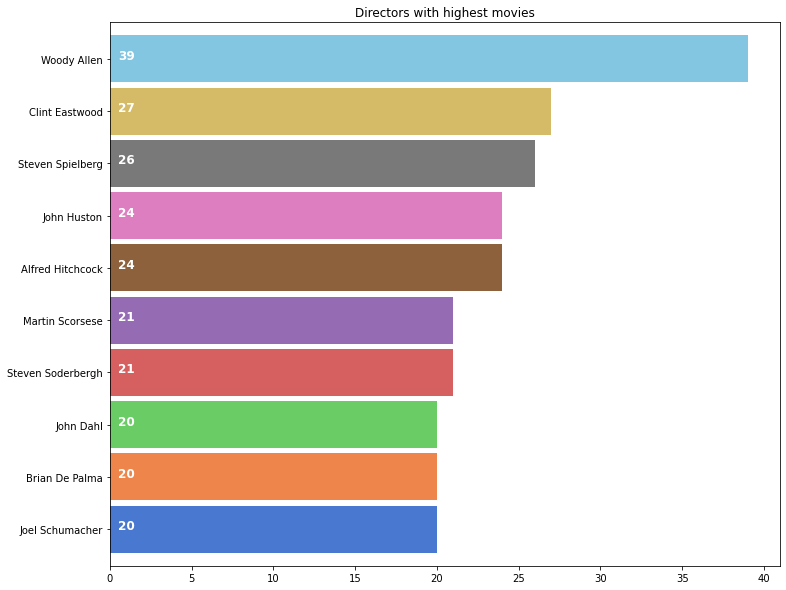

In [746]:
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [747]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [748]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [749]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies.head()

,revenue,vote_average,vote_count,title,original_language,release_date,production_companies,production_countries,genres,director,producer,cast,runtimes,writer,genres_bin,cast_bin,director_bin
0,4300000.0,6.6,714,Four Rooms,en,1995-12-09,"Miramax Films,A Band Apart",United States of America,"[Crime, Comedy]","Allison Anders,Alexandre Rockwell,Robert Rodri...","Lawrence Bender,Paul Hellerman,Scott Lambert,",",AmandaDeCadenet,SammiDavis,ValeriaGolino",98.0,"Allison Anders,Alexandre Rockwell,Robert Rodri...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,12.0,6.4,96,Judgment Night,en,1993-10-15,"Universal Pictures,Largo Entertainment,JVC Ent...","Japan,United States of America","[Action, Thriller, Crime]",Stephen Hopkins,"Gene Levy,Christopher Mollo,Lloyd Segan,",",CubaGoodingJr.,DenisLeary,EmilioEstevez",110.0,"Lewis Colick,Jere Cunningham,Lewis Colick","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,775398007.0,8.1,8550,Star Wars,en,1977-05-25,"Lucasfilm,20th Century Fox",United States of America,"[Adventure, Action, Science Fiction]",George Lucas,"Gary Kurtz,George Lucas,Rick McCallum",",CarrieFisher,HarrisonFord,MarkHamill",121.0,George Lucas,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,940335536.0,7.7,8085,Finding Nemo,en,2003-05-30,Pixar,United States of America,"[Animation, Family]","Andrew Stanton,Lee Unkrich","Jinko Gotoh,John Lasseter,Graham Walters",",AlbertBrooks,AlexanderGould,EllenDeGeneres",100.0,"Andrew Stanton,Andrew Stanton,Bob Peterson,","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,677945399.0,8.3,10346,Forrest Gump,en,1994-07-06,Paramount,United States of America,"[Comedy, Drama, Romance]",Robert Zemeckis,"Wendy Finerman,Charles Newirth,Steve Starkey,",",RebeccaWilliams,SallyField,TomHanks",142.0,"Winston Groom,Eric Roth","[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


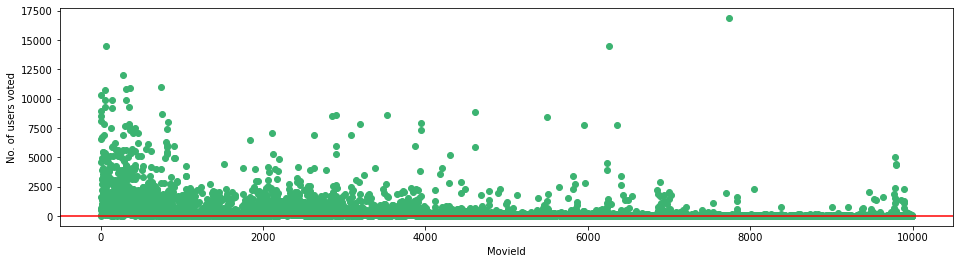

In [750]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(movies['title'].index,movies['vote_count'],color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

<AxesSubplot:xlabel='year'>

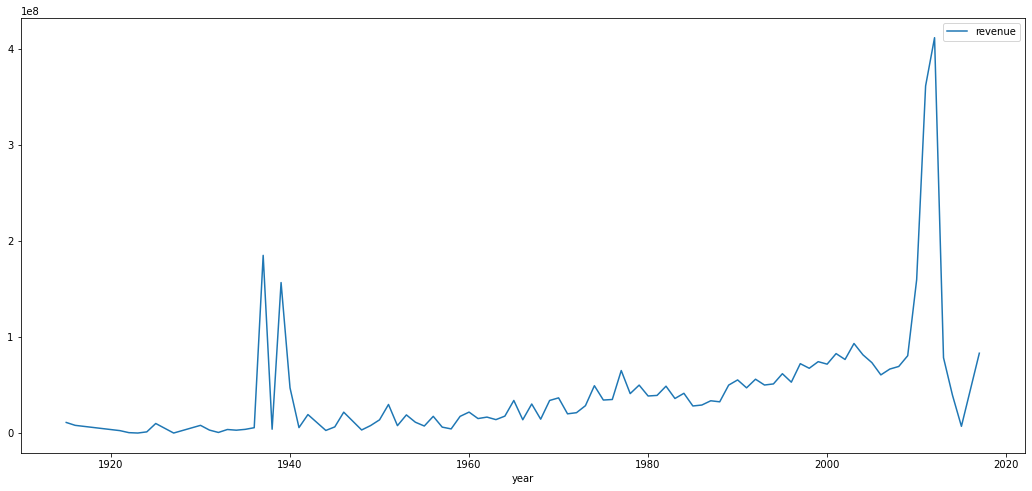

In [751]:
movies['year'] = movies['release_date'].dt.year
year_rev = movies[['year','revenue']].groupby('year').mean()
year_rev.plot(figsize=(18,8))

In [752]:
#Top 10 movies with highest vote count
movies[['title','revenue', 'year','vote_count']].sort_values('vote_count', ascending=False).head(10)

,title,revenue,year,vote_count
7739,Inception,8.255328e+08,2010,16852
71,The Dark Knight,1.004558e+09,2008,14514
6262,Avatar,2.787965e+09,2009,14464
275,Fight Club,1.008538e+08,1999,12052
741,Iron Man,5.851742e+08,2008,10971
361,Pulp Fiction,2.139288e+08,1994,10950
312,The Matrix,4.635174e+08,1999,10800
54,The Lord of the Rings: The Fellowship of the Ring,8.713684e+08,2001,10765
4,Forrest Gump,6.779454e+08,1994,10346
145,The Shawshank Redemption,2.834147e+07,1994,9896


In [753]:
#displaying the top 10 movies according to average voting
movies[movies['vote_count'] > 3000][['title','revenue', 'year','vote_average']].sort_values('vote_average', ascending=False).head(10)

,title,revenue,year,vote_average
145,The Shawshank Redemption,2.834147e+07,1994,8.6
124,The Godfather,2.450664e+08,1972,8.5
126,The Godfather: Part II,1.026000e+08,1974,8.4
216,Schindler's List,3.213656e+08,1993,8.4
71,The Dark Knight,1.004558e+09,2008,8.3
399,GoodFellas,4.683639e+07,1990,8.3
361,Pulp Fiction,2.139288e+08,1994,8.3
816,The Empire Strikes Back,5.384000e+08,1980,8.3
24,American History X,2.387513e+07,1998,8.3
56,The Lord of the Rings: The Return of the King,1.118889e+09,2003,8.3


<AxesSubplot:xlabel='runtimes', ylabel='Density'>

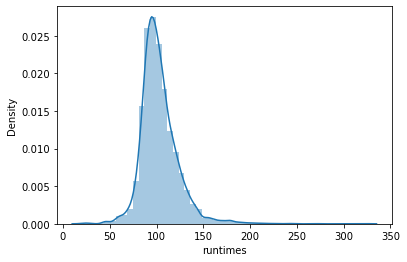

In [754]:
#Movie runtime trend
sns.distplot(movies['runtimes'])

<AxesSubplot:xlabel='year'>

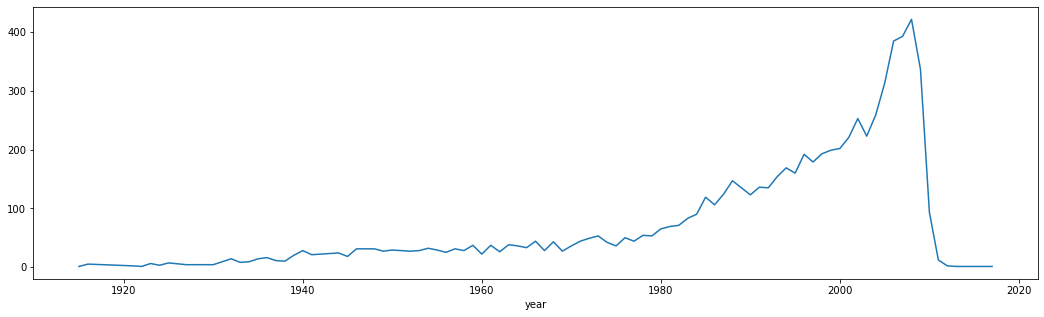

In [755]:
#movies released by year
all_year = movies.groupby('year')['title'].count()
all_year.plot(figsize=(18,5))

In [756]:
#average vote count per decade
def extract_decade(x):
    return str(math.floor(x/10)*10)+"s"
movies["decade"] = movies["year"].apply(extract_decade)
movies = movies.sort_values(by=['decade'], ascending=True)
movies_by_vote = movies.groupby(['decade']).vote_count.sum().reset_index()
bar_data = [go.Bar(x=movies_by_vote['decade']\
                   , y=movies_by_vote["vote_count"],
                     marker=dict(
                        color='rgb(127,188,65)'
                    ))]

py.offline.iplot({ 'data': bar_data,
            'layout': {
               'title': 'Vote Count for each Decade',
               'xaxis': {
                 'title': 'Decade'},
               'yaxis': {
                'title': 'Total Votes'}
        }})

In [757]:
#finding directors who directed more than 5 movies with highest ratings
director_df = movies.groupby('director', as_index=False)
director_df = director_df.mean()
name_counts = movies['director'].value_counts().to_dict() # dictionary of director and number of rows/movies per
director_df['film_count'] = director_df['director'].map(name_counts)
director_df['director+count'] = director_df['director'].map(str) + " (" + director_df['film_count'].map(str) + ")"
dir_means = director_df[['director+count',  'film_count']]
dir_subset = director_df[director_df['film_count'] > 5]
top10rat = dir_subset.sort_values(ascending = False, by = 'vote_average')[['director+count', 'vote_average']].head(10)
top10rat.head(3)

,director+count,vote_average
2343,Quentin Tarantino (6),7.516667
277,Billy Wilder (17),7.505882
2695,Stanley Kubrick (13),7.500000


In [758]:
#director vs ratings plot

data = [go.Bar(
            x=top10rat['vote_average'],
            y=top10rat['director+count'],
            orientation = 'h',
            marker=dict(
            color='rgb(67,162,202)'
        )
)]

layout = dict(
        title='Average Movie Rating for Directors who have directed more than 5 movies',
        margin=go.Margin(
        l=210,
        r=100,
        b=100,
        t=100,
        pad=1),
            xaxis=dict(
            title='Average Rating'
        ),
    
        yaxis=dict(
            title='&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Director (Number of Movies)',
            tickfont=dict(
                size=12,
            )
        )
    
    )

fig = go.Figure(data = data, layout = layout)

iplot(fig)